# NLP - LSTMs, GRUs, Conv1D

In [18]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.2.0


In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

## Generic plot function

In [24]:
def plot_model(history,num_epochs):
    training_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    training_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = np.arange(0,num_epochs)

    # Two plots
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

    # Plot accuracy
    ax[0].plot(epochs,training_acc,label='training',color='r')
    ax[0].plot(epochs,val_acc,label='validation',color='dodgerblue')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    # Plot loss
    ax[1].plot(epochs,training_loss,label='training',color='r')
    ax[1].plot(epochs,val_loss,label='validation',color='dodgerblue')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

In [4]:
tokenizer = info.features['text'].encoder

In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [12]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 100s 257ms/step - loss: 0.4575 - accuracy: 0.7731 - val_loss: 0.3418 - val_accuracy: 0.8626
Epoch 2/10
391/391 [==============================] - 104s 265ms/step - loss: 0.2318 - accuracy: 0.9134 - val_loss: 0.3116 - val_accuracy: 0.8755
Epoch 3/10
391/391 [==============================] - 109s 278ms/step - loss: 0.1735 - accuracy: 0.9377 - val_loss: 0.3275 - val_accuracy: 0.8740
Epoch 4/10
391/391 [==============================] - 102s 261ms/step - loss: 0.1406 - accuracy: 0.9496 - val_loss: 0.3758 - val_accuracy: 0.8692
Epoch 5/10
391/391 [==============================] - 102s 260ms/step - loss: 0.1139 - accuracy: 0.9596 - val_loss: 0.4305 - val_accuracy: 0.8653
Epoch 6/10
391/391 [==============================] - 108s 277ms/step - loss: 0.0936 - accuracy: 0.9680 - val_loss: 0.4545 - val_accuracy: 0.8614
Epoch 7/10
391/391 [==============================] - 104s 267ms/step - loss: 0.0739 - accuracy: 0.9766 - val_loss: 0.5340 -

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

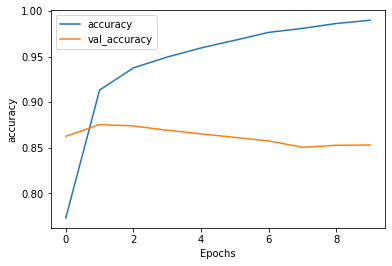

In [14]:
plot_graphs(history, 'accuracy')

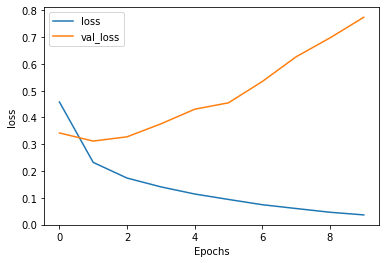

In [15]:
plot_graphs(history, 'loss')

## Load imdb_reviews

## Only Flatten

In [16]:
imdb, info = tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [19]:
train_data , test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(s.numpy().decode('utf8'))
    training_labels.append(l)
    
for s, l in test_data:
    testing_sentences.append(s.numpy().decode('utf8'))
    testing_labels.append(l)
    
training_labels_final  = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [20]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok="<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)


testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)


In [21]:
# Create a reverse index to ease of lookup
reverse_word_index = dict([(value,key) for (key, value ) in word_index.items()])

# function that does the lookup and joins the words into a sentence
def decode_review(text):
    return ' '.join([reverse_word_index.get(word,'?') for word in text])

# Compare both
print(decode_review(padded[4]))
print(''.join(['-' for i in range(60)])) # Seperator
print(training_sentences[4])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? as others have mentioned all the women that go nude in this film are mostly absolutely gorgeous the plot very <OOV> shows the <OOV> of the female <OOV> when men are around they want to be pursued but when no men are around they become the <OOV> of a 14 year old boy and the boy becomes a man really fast we should all be so lucky at this age he then gets up the courage to pursue his true love
------------------------------------------------------------
As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. The plot very ably shows the hypocrisy of the female libido. When men are around they want to be pursued, but when no "men" are around, they become the pursuers of a 14 year old boy. And the boy becomes a man really fast (we should all be so lucky at this age!). He then gets up the courage to pursue his true love.


In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 21s 27ms/step - loss: 0.4927 - accuracy: 0.7410 - val_loss: 0.3494 - val_accuracy: 0.8471
Epoch 2/10
782/782 [==============================] - 23s 29ms/step - loss: 0.2409 - accuracy: 0.9054 - val_loss: 0.3657 - val_accuracy: 0.8412
Epoch 3/10
782/782 [==============================] - 26s 33ms/step - loss: 0.0968 - accuracy: 0.9739 - val_loss: 0.4608 - val_accuracy: 0.8246
Epoch 4/10
782/782 [==============================] - 22s 28ms/step - loss: 0.0231 - accuracy: 0.9969 - val_loss: 0.5326 - val_accuracy: 0.8285
Epoch 5/10
782/782 [==============================] - 19s 24ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 0.5945 - val_accuracy: 0.8293
Epoch 6/10
782/782 [==============================] - 21s 27ms/step - loss: 0.0021 - accuracy: 0.9999 - val_loss: 0.6449 - val_accuracy: 0.8300
Epoch 7/10
782/782 [==============================] - 26s 33ms/step - loss: 8.6543e-04 - accuracy: 1.0000 - val_loss: 0.6868 - val_accur

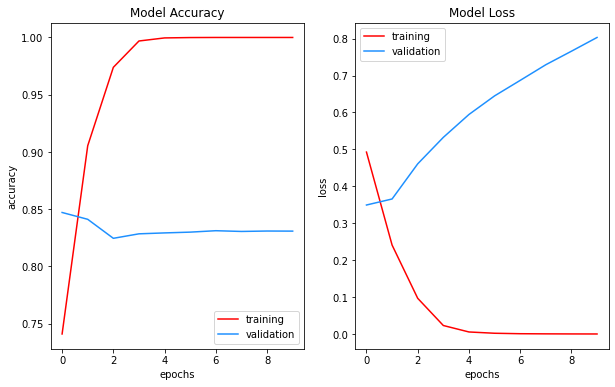

In [26]:
plot_model(history, num_epochs)

## GRU

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                4800      
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 165,005
Trainable params: 165,005
Non-trainable params: 0
_________________________________________________________________


In [29]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 129s 165ms/step - loss: 0.5191 - accuracy: 0.7230 - val_loss: 0.3684 - val_accuracy: 0.8367
Epoch 2/10
782/782 [==============================] - 130s 166ms/step - loss: 0.3124 - accuracy: 0.8749 - val_loss: 0.3580 - val_accuracy: 0.8494
Epoch 3/10
782/782 [==============================] - 132s 168ms/step - loss: 0.2474 - accuracy: 0.9063 - val_loss: 0.3782 - val_accuracy: 0.8373
Epoch 4/10
782/782 [==============================] - 110s 141ms/step - loss: 0.2073 - accuracy: 0.9234 - val_loss: 0.3757 - val_accuracy: 0.8442
Epoch 5/10
782/782 [==============================] - 132s 168ms/step - loss: 0.1658 - accuracy: 0.9423 - val_loss: 0.4444 - val_accuracy: 0.8382
Epoch 6/10
782/782 [==============================] - 125s 160ms/step - loss: 0.1331 - accuracy: 0.9554 - val_loss: 0.5129 - val_accuracy: 0.8301
Epoch 7/10
782/782 [==============================] - 132s 169ms/step - loss: 0.1084 - accuracy: 0.9646 - val_loss: 0.5216 -

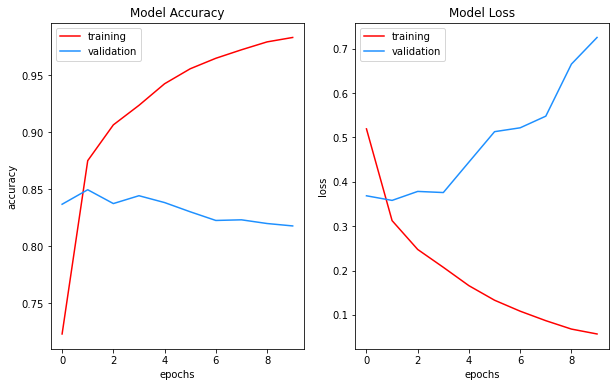

In [30]:
plot_model(history, num_epochs)

## LSTM

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                4800      
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 198       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 165,005
Trainable params: 165,005
Non-trainable params: 0
_________________________________________________________________


In [32]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 132s 169ms/step - loss: 0.5009 - accuracy: 0.7315 - val_loss: 0.3573 - val_accuracy: 0.8443
Epoch 2/10
782/782 [==============================] - 93s 119ms/step - loss: 0.3060 - accuracy: 0.8768 - val_loss: 0.3611 - val_accuracy: 0.8472
Epoch 3/10
782/782 [==============================] - 86s 110ms/step - loss: 0.2452 - accuracy: 0.9072 - val_loss: 0.4176 - val_accuracy: 0.8322
Epoch 4/10
782/782 [==============================] - 87s 111ms/step - loss: 0.2087 - accuracy: 0.9212 - val_loss: 0.3785 - val_accuracy: 0.8402
Epoch 5/10
782/782 [==============================] - 89s 113ms/step - loss: 0.1727 - accuracy: 0.9382 - val_loss: 0.4260 - val_accuracy: 0.8375
Epoch 6/10
782/782 [==============================] - 99s 127ms/step - loss: 0.1303 - accuracy: 0.9563 - val_loss: 0.5162 - val_accuracy: 0.8325
Epoch 7/10
782/782 [==============================] - 80s 102ms/step - loss: 0.1022 - accuracy: 0.9653 - val_loss: 0.5712 - val_a

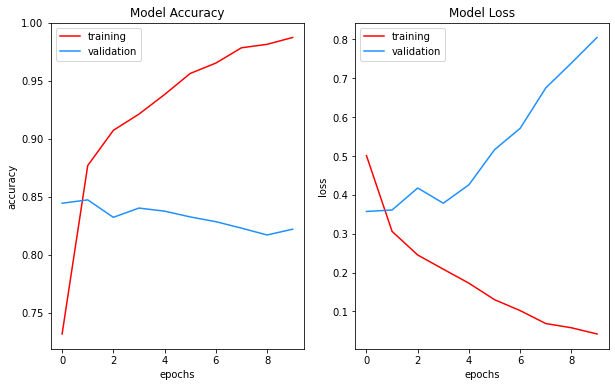

In [33]:
plot_model(history, num_epochs)

## Bi-directional GRU

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

Epoch 1/10
782/782 [==============================] - 137s 175ms/step - loss: 0.4920 - accuracy: 0.7331 - val_loss: 0.3413 - val_accuracy: 0.8514
Epoch 2/10
782/782 [==============================] - 140s 179ms/step - loss: 0.2908 - accuracy: 0.8811 - val_loss: 0.3457 - val_accuracy: 0.8489
Epoch 3/10
782/782 [==============================] - 138s 176ms/step - loss: 0.2294 - accuracy: 0.9117 - val_loss: 0.3687 - val_accuracy: 0.8397
Epoch 4/10
782/782 [==============================] - 171s 219ms/step - loss: 0.1806 - accuracy: 0.9324 - val_loss: 0.4318 - val_accuracy: 0.8373
Epoch 5/10
782/782 [==============================] - 157s 201ms/step - loss: 0.1339 - accuracy: 0.9521 - val_loss: 0.4868 - val_accuracy: 0.8238
Epoch 6/10
782/782 [==============================] - 143s 183ms/step - loss: 0.0901 - accuracy: 0.9690 - val_loss: 0.6076 - val_accuracy: 0.8180
Epoch 7/10
782/782 [==============================] - 131s 167ms/step - loss: 0.0589 - accuracy: 0.9802 - val_loss: 0.6827 -

In [ ]:
plot_model(history, num_epochs)

## Bi-directional LSTM

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

In [ ]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

In [ ]:
plot_model(history, num_epochs)

## Conv-1d

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1d(128,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
             metrics=['accuracy'])
model.summary()

In [ ]:
num_epochs = 10
history = model.fit(padded, 
          training_labels_final, 
          epochs=num_epochs,
          validation_data=(testing_padded,testing_labels_final)
         )

In [ ]:
plot_model(history, num_epochs)